In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import entropy
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import optuna

In [2]:
merged_data2 = pd.read_csv('ProcessedData/MergedData/DatasetBearingTest_2.csv')
merged_data2.rename(columns={'Unnamed: 0':'time'}, inplace=True)
merged_data2.time = pd.to_datetime(merged_data2['time'], format='%Y-%m-%d %H:%M:%S')
merged_data2.index=merged_data2['time']
merged_data2 = merged_data2.sort_index()
merged_data2.drop(columns=['time'], inplace=True)
merged_data2

Bearing 1  Bearing 2  Bearing 3  Bearing 4
time                                                           
2004-02-12 10:32:39   0.058332   0.071832   0.083244   0.043065
2004-02-12 10:42:39   0.058997   0.074008   0.084439   0.044540
2004-02-12 10:52:39   0.060239   0.074223   0.083922   0.044442
2004-02-12 11:02:39   0.061453   0.073843   0.084462   0.045081
2004-02-12 11:12:39   0.061361   0.075606   0.082837   0.045118
...                        ...        ...        ...        ...
2004-02-19 05:42:39   0.453318   0.161011   0.137444   0.119042
2004-02-19 05:52:39   0.337575   0.132397   0.144997   0.092123
2004-02-19 06:02:39   0.351094   0.152259   0.151296   0.100813
2004-02-19 06:12:39   0.001857   0.003731   0.003656   0.001786
2004-02-19 06:22:39   0.001168   0.000767   0.000716   0.001699

[984 rows x 4 columns]

In [3]:
merged_data3 = pd.read_csv('ProcessedData/MergedData/DatasetBearingTest_3.csv')
merged_data3.rename(columns={'Unnamed: 0':'time'}, inplace=True)
merged_data3.time = pd.to_datetime(merged_data3['time'], format='%Y-%m-%d %H:%M:%S')
merged_data3.index=merged_data3['time']
merged_data3 = merged_data3.sort_index()
merged_data3.drop(columns=['time'], inplace=True)
merged_data3

Bearing 1  Bearing 2  Bearing 3  Bearing 4
time                                                           
2004-03-04 09:27:46   0.061629   0.075288   0.051990   0.043475
2004-03-04 09:32:46   0.060776   0.072208   0.052238   0.042038
2004-03-04 09:42:46   0.062192   0.072886   0.054810   0.041359
2004-03-04 09:52:46   0.062992   0.073434   0.054262   0.043128
2004-03-04 10:02:46   0.061945   0.073006   0.053243   0.042619
...                        ...        ...        ...        ...
2004-04-18 02:02:55   0.122481   0.188264   0.342760   0.195163
2004-04-18 02:12:55   0.110247   0.166032   0.331774   0.205829
2004-04-18 02:22:55   0.115788   0.201606   0.404300   0.222182
2004-04-18 02:32:55   0.119910   0.199326   0.543762   0.229032
2004-04-18 02:42:55   0.001533   0.002441   0.003663   0.001428

[6324 rows x 4 columns]

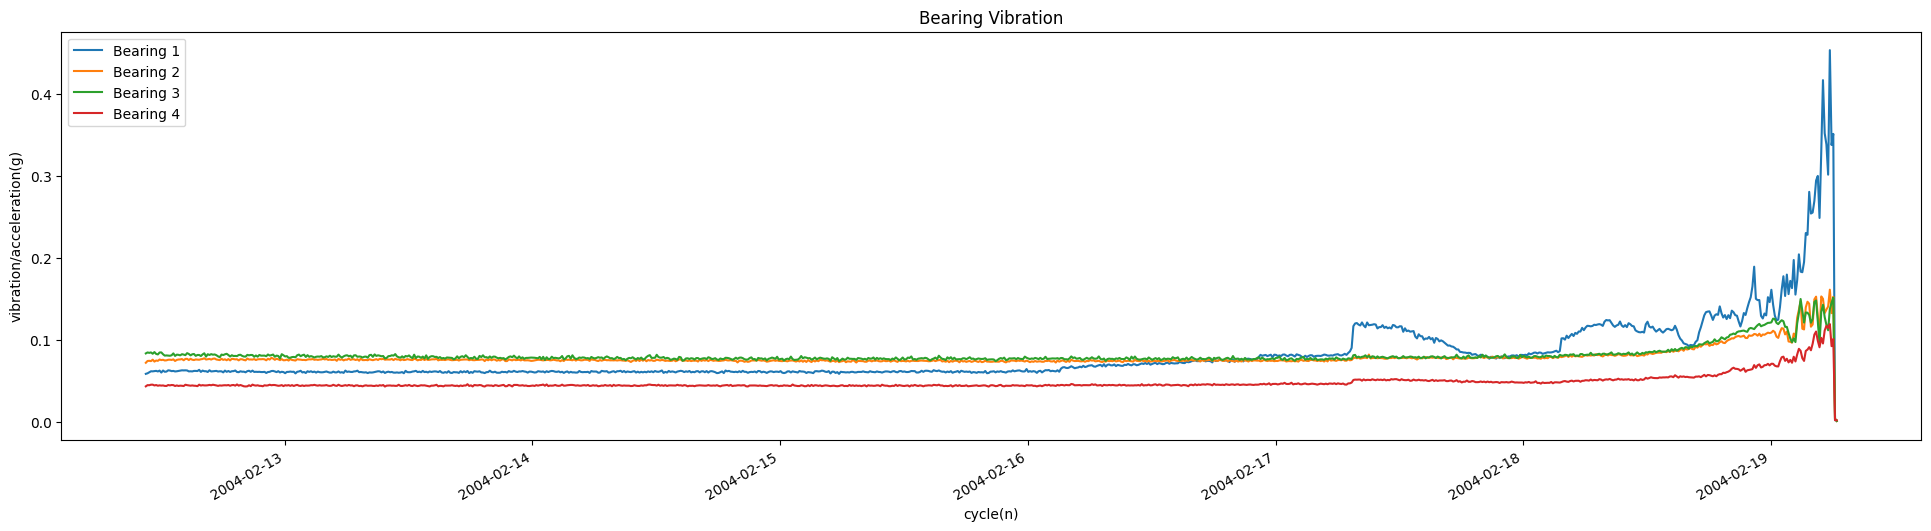

In [4]:
ax = merged_data2.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

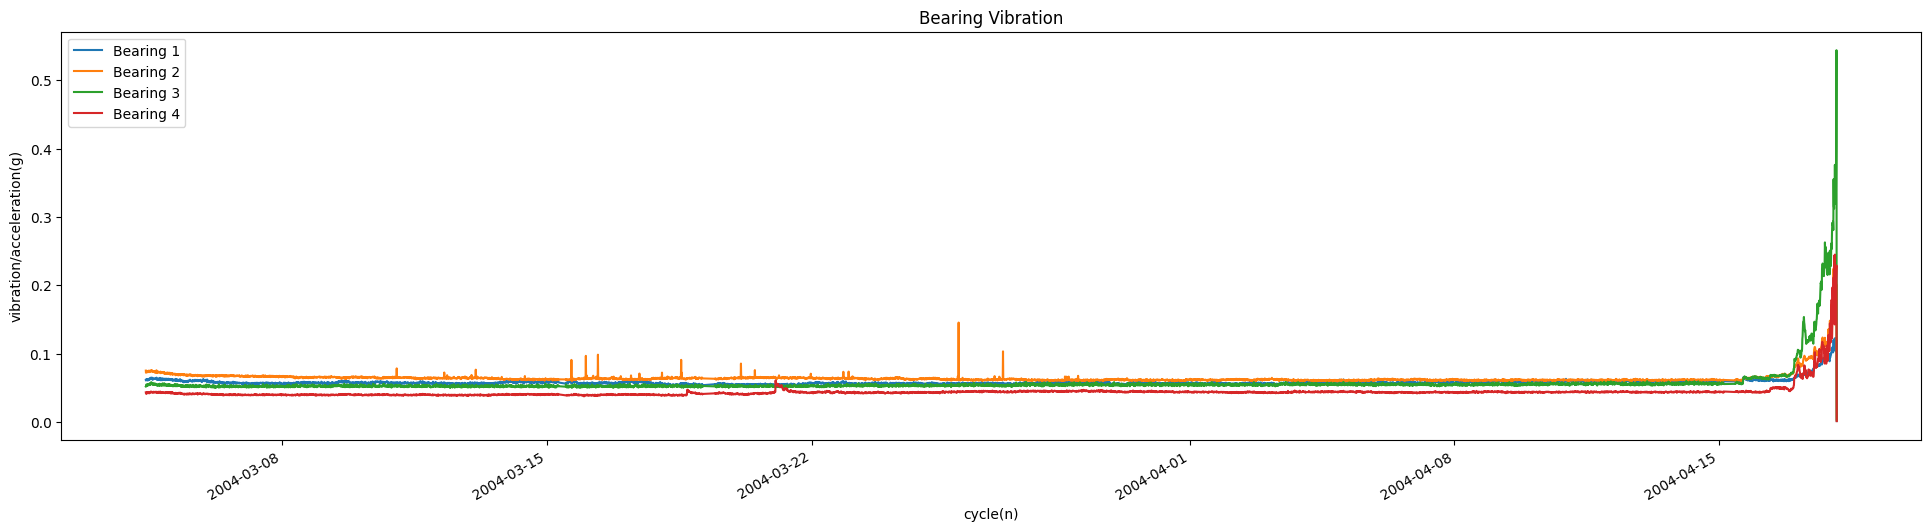

In [5]:
ax = merged_data3.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [6]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
%matplotlib inline

In [7]:
split_index2 = int(0.5 * len(merged_data2))
split_index3 = int(0.5 * len(merged_data3))

In [8]:
train_data2 = merged_data2.iloc[:split_index2]
test_data2 = merged_data2.iloc[split_index2:]
train_data3 = merged_data3.iloc[:split_index3]
test_data3 = merged_data3.iloc[split_index3:]

Normalize Data

In [9]:
# scaler2 = preprocessing.MinMaxScaler()
# X_train2 = pd.DataFrame(scaler2.fit_transform(train_data2), columns=train_data2.columns, index=train_data2.index)
# X_test2 = pd.DataFrame(scaler2.transform(test_data2), columns=test_data2.columns, index=test_data2.index)

# scaler3 = preprocessing.MinMaxScaler()
# X_train3 = pd.DataFrame(scaler3.fit_transform(train_data3), columns=train_data3.columns, index=train_data3.index)
# X_test3 = pd.DataFrame(scaler3.transform(test_data3), columns=test_data3.columns, index=test_data3.index)

In [10]:
X_train2 = train_data2
X_test2 = test_data2
X_train3 = train_data3
X_test3 = test_data3

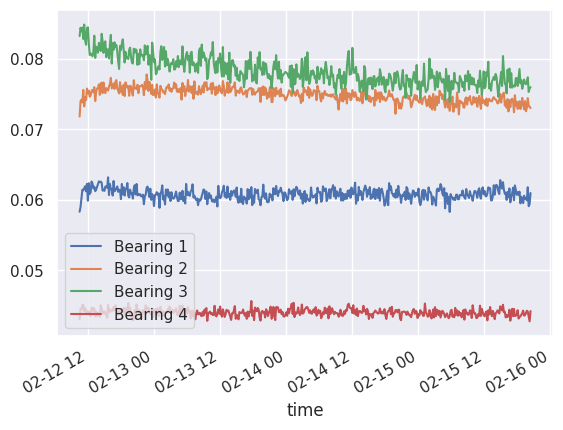

In [11]:
X_train2.plot()
plt.show()

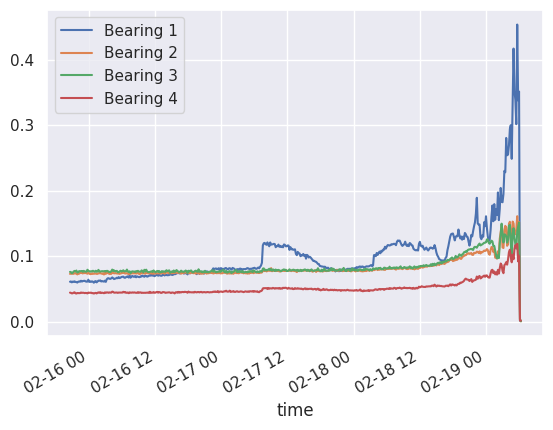

In [12]:
X_test2.plot()
plt.show()

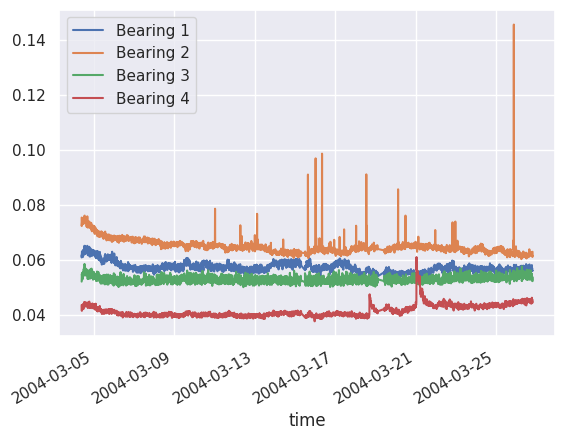

In [13]:
X_train3.plot()
plt.show()

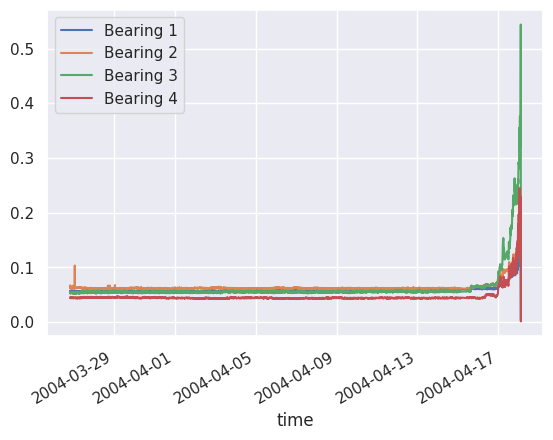

In [14]:
X_test3.plot()
plt.show()

In [15]:
import numpy as np
import plotly.express as px
from sklearn.manifold import TSNE

# 假設 X_train, X_test 已經定義
# 這裡用隨機數據來模擬你的資料
np.random.seed(42)

# 合併數據以便一起降維
X_combined = np.vstack([X_train2, X_test2, X_train3, X_test3])
labels = np.array(["Train2"] * len(X_train2) + ["Test2"] * len(X_test2) + ["Train3"] * len(X_train3) + ["Test3"] * len(X_test3))

# 使用 t-SNE 進行降維 (8D -> 3D)
tsne = TSNE(n_components=3, random_state=42)
X_embedded = tsne.fit_transform(X_combined)

# 建立 DataFrame 來繪圖
data = {
    "x": X_embedded[:, 0],
    "y": X_embedded[:, 1],
    "z": X_embedded[:, 2],
    "Dataset": labels
}

# 使用 Plotly 繪製 3D 散點圖
fig = px.scatter_3d(
    data, x="x", y="y", z="z", color="Dataset",
    title="t-SNE Visualization of Train and Test Data",
    labels={"Dataset": "Data Type"}
)
fig.show()

In [16]:
_ = X_train2.values.copy()
np.random.shuffle(_)
ocsvm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.005)
ocsvm.fit(_)

OneClassSVM(gamma=0.01, nu=0.005)

In [17]:
X_train2.shape, X_test2.shape

((492, 4), (492, 4))

In [18]:
train_scores = ocsvm.decision_function(X_train2)
train_anomalies = ocsvm.predict(X_train2)
test_scores = ocsvm.decision_function(X_test2)
test_anomalies = ocsvm.predict(X_test2)

In [19]:
#calculate anomaly scores
scores = ocsvm.decision_function(pd.concat([X_train2, X_test2]))

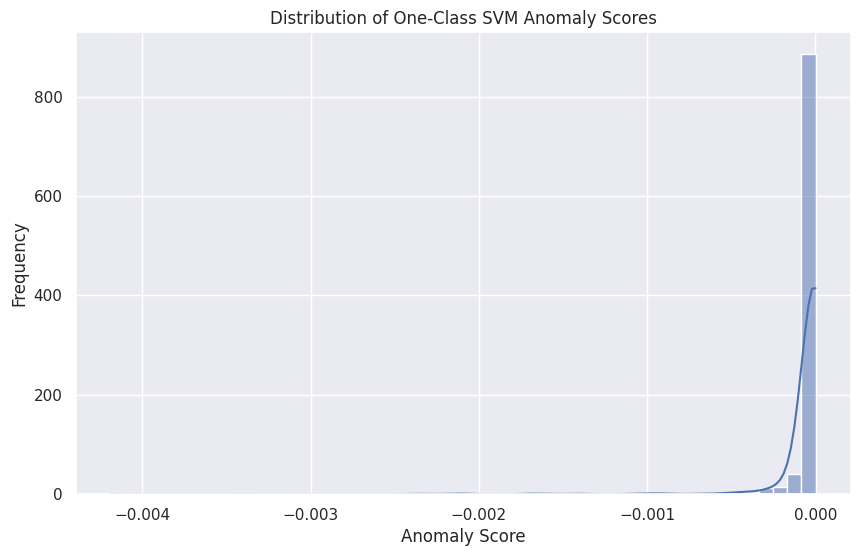

In [20]:
#distribution of scores
plt.figure(figsize=(10,6))
sns.histplot(scores, bins=50, kde=True)
plt.title('Distribution of One-Class SVM Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [21]:
ocsvm_results = pd.DataFrame(index=X_train2.index.append(X_test2.index))
ocsvm_results['Score'] = np.concatenate([train_scores, test_scores])
ocsvm_results['Anomaly'] = np.concatenate([train_anomalies, test_anomalies])

#anomalies are marked as -1, normal as 1
ocsvm_results['Anomaly'] = ocsvm_results['Anomaly'] == -1

In [22]:
# threshold = min(np.percentile(scores, 25),0)
threshold = min(np.percentile(scores, 10),0)
print(f"Custom Threshold: {threshold}")
ocsvm_results['Anomaly_Custom'] = ocsvm_results['Score'] < threshold
merged_data2['Anomaly_OCSVM'] = ocsvm_results['Anomaly_Custom'].values

Custom Threshold: -8.34251157943111e-05


In [23]:
merged_data2

Bearing 1  Bearing 2  Bearing 3  Bearing 4  Anomaly_OCSVM
time                                                                          
2004-02-12 10:32:39   0.058332   0.071832   0.083244   0.043065          False
2004-02-12 10:42:39   0.058997   0.074008   0.084439   0.044540          False
2004-02-12 10:52:39   0.060239   0.074223   0.083922   0.044442          False
2004-02-12 11:02:39   0.061453   0.073843   0.084462   0.045081          False
2004-02-12 11:12:39   0.061361   0.075606   0.082837   0.045118          False
...                        ...        ...        ...        ...            ...
2004-02-19 05:42:39   0.453318   0.161011   0.137444   0.119042           True
2004-02-19 05:52:39   0.337575   0.132397   0.144997   0.092123           True
2004-02-19 06:02:39   0.351094   0.152259   0.151296   0.100813           True
2004-02-19 06:12:39   0.001857   0.003731   0.003656   0.001786           True
2004-02-19 06:22:39   0.001168   0.000767   0.000716   0.001699           True

[984 rows x 5 columns]

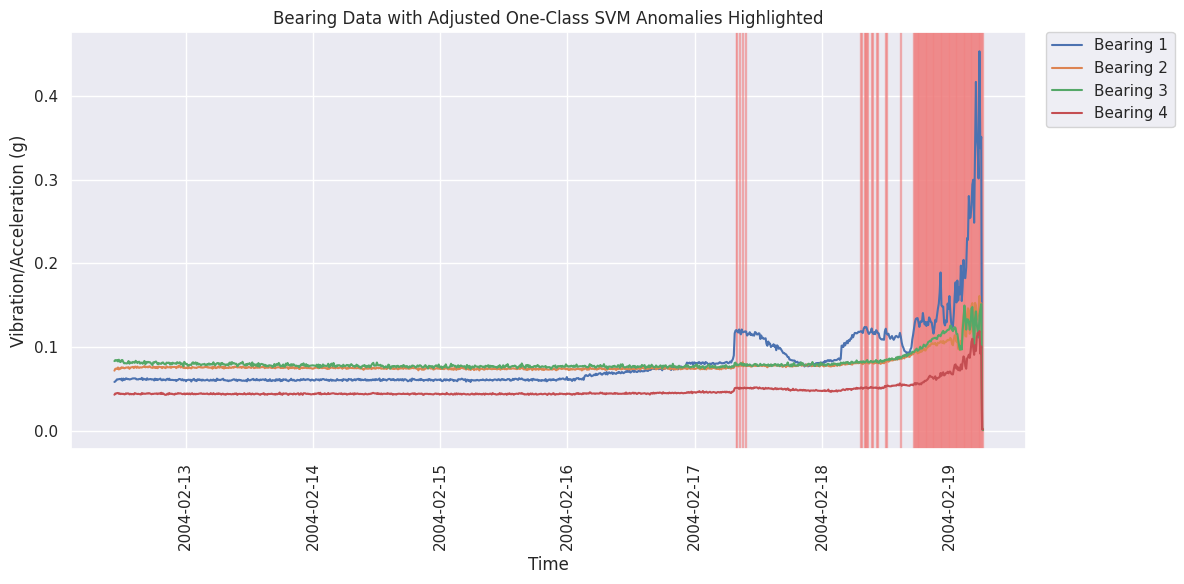

In [24]:
plt.figure(figsize=(12, 6))

for col in merged_data2.columns[:4]:
    plt.plot(merged_data2.index, merged_data2[col], label=col)

for i in range(len(merged_data2) - 1):
    if merged_data2['Anomaly_OCSVM'].iloc[i]:
        plt.axvspan(merged_data2.index[i], merged_data2.index[i + 1], color='lightcoral', alpha=0.5)

plt.title("Bearing Data with Adjusted One-Class SVM Anomalies Highlighted")
plt.xlabel("Time")
plt.ylabel("Vibration/Acceleration (g)")
plt.xticks(rotation=90)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

In [25]:
X_train2.shape, X_train3.shape

((492, 4), (3162, 4))

In [29]:
_ = X_train2.values.copy()
__ = X_train3[:20].values.copy()
np.random.shuffle(_)
np.random.shuffle(__)
np.concatenate([_,__]).shape

(512, 4)

In [30]:
_ = X_train2.values.copy()
__ = X_train3[:20].values.copy()
___ = np.concatenate([_,__])
np.random.shuffle(___)
ocsvm.fit(___)

OneClassSVM(gamma=0.01, nu=0.005)

In [31]:
#calculate anomaly scores
scores = ocsvm.decision_function(pd.concat([X_train2, X_test2]))

In [32]:
ocsvm_results = pd.DataFrame(index=X_train2.index.append(X_test2.index))
ocsvm_results['Score'] = np.concatenate([train_scores, test_scores])
ocsvm_results['Anomaly'] = np.concatenate([train_anomalies, test_anomalies])

#anomalies are marked as -1, normal as 1
ocsvm_results['Anomaly'] = ocsvm_results['Anomaly'] == -1

In [33]:
# threshold = min(np.percentile(scores, 25),0)
threshold = min(np.percentile(scores, 10),0)
print(f"Custom Threshold: {threshold}")
ocsvm_results['Anomaly_Custom'] = ocsvm_results['Score'] < threshold
merged_data2['Anomaly_OCSVM'] = ocsvm_results['Anomaly_Custom'].values

Custom Threshold: -8.550803974718412e-05


In [34]:
merged_data2

Bearing 1  Bearing 2  Bearing 3  Bearing 4  Anomaly_OCSVM
time                                                                          
2004-02-12 10:32:39   0.058332   0.071832   0.083244   0.043065          False
2004-02-12 10:42:39   0.058997   0.074008   0.084439   0.044540          False
2004-02-12 10:52:39   0.060239   0.074223   0.083922   0.044442          False
2004-02-12 11:02:39   0.061453   0.073843   0.084462   0.045081          False
2004-02-12 11:12:39   0.061361   0.075606   0.082837   0.045118          False
...                        ...        ...        ...        ...            ...
2004-02-19 05:42:39   0.453318   0.161011   0.137444   0.119042           True
2004-02-19 05:52:39   0.337575   0.132397   0.144997   0.092123           True
2004-02-19 06:02:39   0.351094   0.152259   0.151296   0.100813           True
2004-02-19 06:12:39   0.001857   0.003731   0.003656   0.001786           True
2004-02-19 06:22:39   0.001168   0.000767   0.000716   0.001699           True

[984 rows x 5 columns]

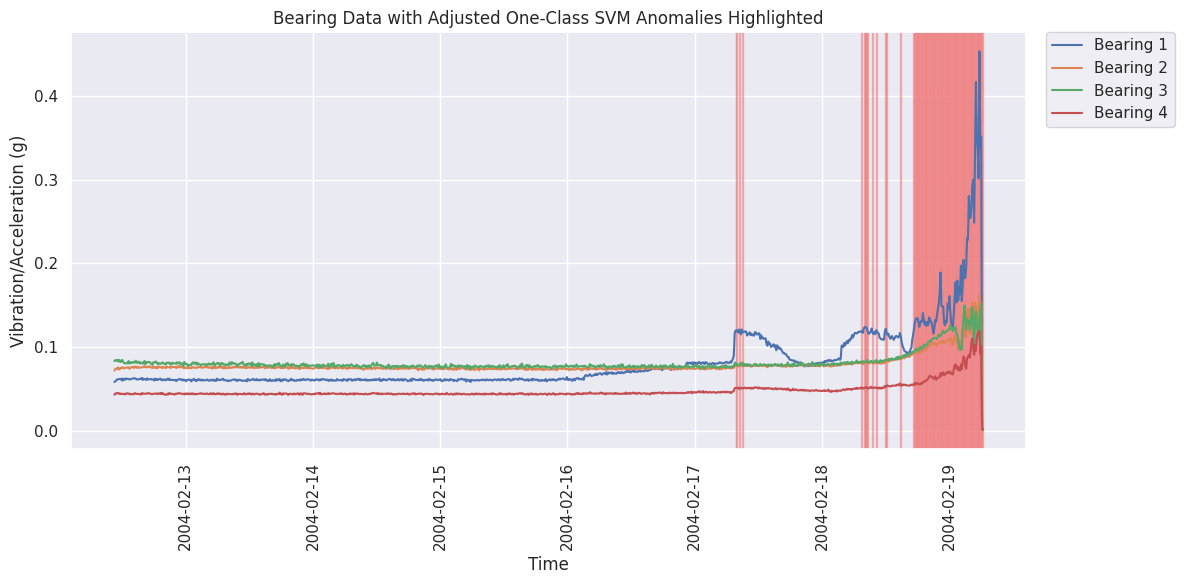

In [35]:
plt.figure(figsize=(12, 6))

for col in merged_data2.columns[:4]:
    plt.plot(merged_data2.index, merged_data2[col], label=col)

for i in range(len(merged_data2) - 1):
    if merged_data2['Anomaly_OCSVM'].iloc[i]:
        plt.axvspan(merged_data2.index[i], merged_data2.index[i + 1], color='lightcoral', alpha=0.5)

plt.title("Bearing Data with Adjusted One-Class SVM Anomalies Highlighted")
plt.xlabel("Time")
plt.ylabel("Vibration/Acceleration (g)")
plt.xticks(rotation=90)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

In [36]:
scores = ocsvm.decision_function(pd.concat([X_train3, X_test3]))
train_scores = ocsvm.decision_function(X_train3)
train_anomalies = ocsvm.predict(X_train3)
test_scores = ocsvm.decision_function(X_test3)
test_anomalies = ocsvm.predict(X_test3)

In [37]:
ocsvm_results = pd.DataFrame(index=X_train3.index.append(X_test3.index))
ocsvm_results['Score'] = np.concatenate([train_scores, test_scores])
ocsvm_results['Anomaly'] = np.concatenate([train_anomalies, test_anomalies])

#anomalies are marked as -1, normal as 1
ocsvm_results['Anomaly'] = ocsvm_results['Anomaly'] == -1

In [38]:
ocsvm_results

Score  Anomaly
time                                  
2004-03-04 09:27:46 -0.000019     True
2004-03-04 09:32:46 -0.000019     True
2004-03-04 09:42:46 -0.000015     True
2004-03-04 09:52:46 -0.000016     True
2004-03-04 10:02:46 -0.000017     True
...                       ...      ...
2004-04-18 02:02:55 -0.002787     True
2004-04-18 02:12:55 -0.002577     True
2004-04-18 02:22:55 -0.004003     True
2004-04-18 02:32:55 -0.006876     True
2004-04-18 02:42:55 -0.000419     True

[6324 rows x 2 columns]

In [45]:
threshold = min(np.percentile(scores, 3),0)
print(f"Custom Threshold: {threshold}")
ocsvm_results['Anomaly_Custom'] = ocsvm_results['Score'] < threshold
merged_data3['Anomaly_OCSVM'] = ocsvm_results['Anomaly_Custom'].values

Custom Threshold: -2.5905396056238316e-05


In [46]:
merged_data3

Bearing 1  Bearing 2  Bearing 3  Bearing 4  Anomaly_OCSVM
time                                                                          
2004-03-04 09:27:46   0.061629   0.075288   0.051990   0.043475          False
2004-03-04 09:32:46   0.060776   0.072208   0.052238   0.042038          False
2004-03-04 09:42:46   0.062192   0.072886   0.054810   0.041359          False
2004-03-04 09:52:46   0.062992   0.073434   0.054262   0.043128          False
2004-03-04 10:02:46   0.061945   0.073006   0.053243   0.042619          False
...                        ...        ...        ...        ...            ...
2004-04-18 02:02:55   0.122481   0.188264   0.342760   0.195163           True
2004-04-18 02:12:55   0.110247   0.166032   0.331774   0.205829           True
2004-04-18 02:22:55   0.115788   0.201606   0.404300   0.222182           True
2004-04-18 02:32:55   0.119910   0.199326   0.543762   0.229032           True
2004-04-18 02:42:55   0.001533   0.002441   0.003663   0.001428           True

[6324 rows x 5 columns]

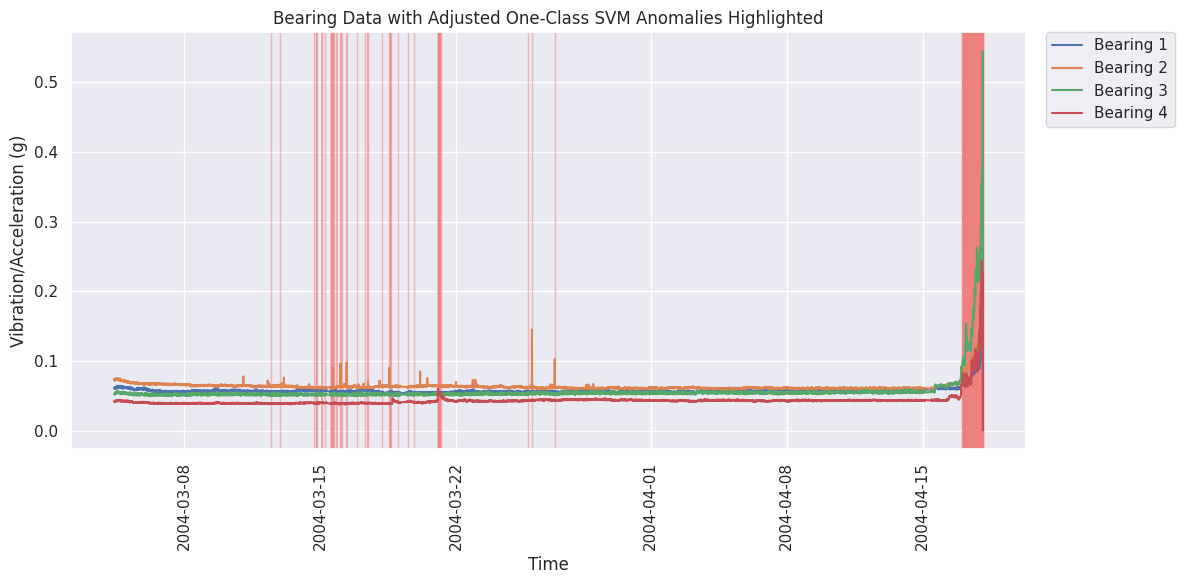

In [47]:
plt.figure(figsize=(12, 6))

for col in merged_data3.columns[:4]:
    plt.plot(merged_data3.index, merged_data3[col], label=col)

for i in range(len(merged_data3) - 1):
    if merged_data3['Anomaly_OCSVM'].iloc[i]:
        plt.axvspan(merged_data3.index[i], merged_data3.index[i + 1], color='lightcoral', alpha=0.5)

plt.title("Bearing Data with Adjusted One-Class SVM Anomalies Highlighted")
plt.xlabel("Time")
plt.ylabel("Vibration/Acceleration (g)")
plt.xticks(rotation=90)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()